# Lecture 4

* Gaussians
* Gaussian Discriminant Analysis
* Naive Bayes

Loading necessary libraries:

In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as ds
%matplotlib inline

# Gaussians

We can visualize Gaussians in Python:

In [2]:
sigma = [[1.0, 0.75], [0.25, 1.0]]
print np.array(sigma)

[[ 1.    0.75]
 [ 0.25  1.  ]]


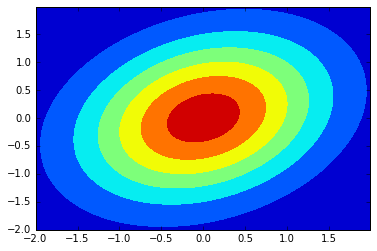

In [3]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.0, 0.0], sigma)
plt.contourf(x, y, rv.pdf(pos))
plt.show()

# Gaussian Discriminant Analysis

Gaussian Discriminant Analysis is implemented in the ```scikit-learn``` package:

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Generate training examples with two classes and two features:

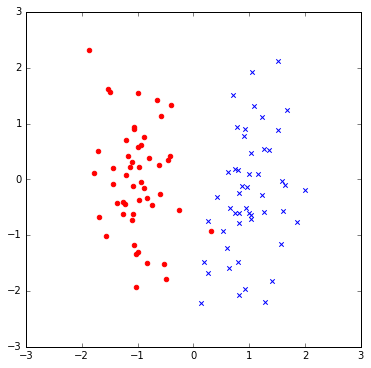

In [5]:
X,y = ds.make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=1,
                             n_clusters_per_class=1,
                             random_state=3216)
markers = ['o', 'x']
ix0 = [i for i,x in enumerate(y) if x == 0]
ix1 = [i for i,x in enumerate(y) if x == 1]
fig = plt.figure(figsize=(6,6))
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.show()

There are two implementations of Gaussian Discriminant Analysis in ```scikit-learn```: Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA). We try to use both and compare the results. First, we train a model for Linear Discriminant Analysis:

In [6]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)

Visualize the result:

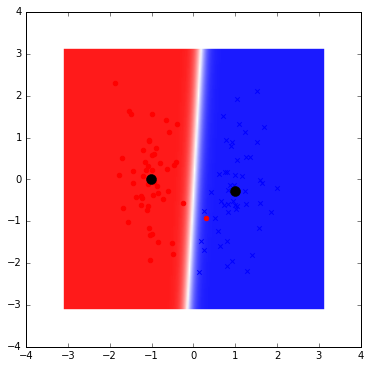

In [7]:
x1, x2 = np.meshgrid(np.linspace(-3.1, 3.1, 200),
                     np.linspace(-3.1, 3.1, 200))
y_pred = 1.0 - lda.predict_proba(np.c_[x1.ravel(), x2.ravel()])
y_pred = y_pred[:, 1].reshape(x1.shape)
extent = -3.1, 3.1, -3.1, 3.1

fig = plt.figure(figsize=(6,6))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.9, 
           interpolation='bilinear', extent = extent, origin='lower')
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')

#means
plt.plot(lda.means_[0][0], lda.means_[0][1],
         'o', color='black', markersize=10)
plt.plot(lda.means_[1][0], lda.means_[1][1],
         'o', color='black', markersize=10)

plt.show()

We do the same for Quadratic Discriminant Analysis:

In [8]:
qda = QuadraticDiscriminantAnalysis(store_covariances=True)
y_pred = qda.fit(X, y).predict(X)

and visualize the results:

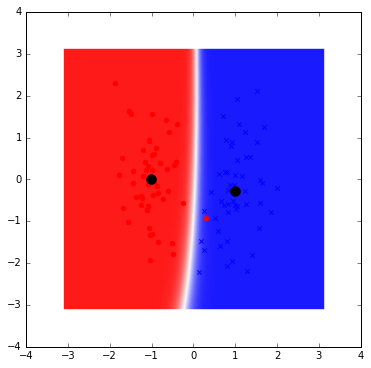

In [9]:
x1, x2 = np.meshgrid(np.linspace(-3.1, 3.1, 200),
                     np.linspace(-3.1, 3.1, 200))
y_pred = 1.0 - qda.predict_proba(np.c_[x1.ravel(), x2.ravel()])
y_pred = y_pred[:, 1].reshape(x1.shape)
extent = -3.1, 3.1, -3.1, 3.1

fig = plt.figure(figsize=(6,6))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.9, 
           interpolation='bilinear', extent = extent, origin='lower')
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')

#means
plt.plot(lda.means_[0][0], lda.means_[0][1],
         'o', color='black', markersize=10)
plt.plot(lda.means_[1][0], lda.means_[1][1],
         'o', color='black', markersize=10)

plt.show()

# Naive Bayes

There are several packages in Python with implemented Naive Bayes. The package ```scikit-learn``` has several implementations: ```GaussianNB```, ```MultinomialNB``` and ```BernoulliNB```. In this section we are going to use different implementation from ```nltk``` package that is convenient for text classification. We are going to use the ```movie_reviews``` dataset from this package:

In [10]:
import nltk
from nltk.corpus import movie_reviews
import random
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

This dataset contains 2000 movie reviews manually labeled by 'pos' (positive review) or 'neg' (negative review).

In [12]:
labels = [x[1] for x in documents]
print ("Number of positive reviews: " +
       str(len([x for x in labels if x == 'pos'])))
print ("Number of negative reviews: " +
       str(len([x for x in labels if x == 'neg'])))

Number of positive reviews: 1000
Number of negative reviews: 1000


We choose the 2000 most frequent words and define the function that generates binary feature vector $x$ based on these 2000 words for each document.

In [13]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

Here is the example how this function works:

In [14]:
from itertools import islice
feature = document_features(['batmans', 'inquires', 'rags'])
for key in islice(feature, 10):
    print key + ': ' + str(feature[key])

contains(corporate): False
contains(barred): False
contains(batmans): True
contains(menacing): False
contains(rags): True
contains(inquires): True
contains(nosebleeding): False
contains(playhouse): False
contains(peculiarities): False
contains(kilgore): False


The next step builds train and test sets. We add randomly 1900 documents to the train set and other 100 documents to the test set.

In [15]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
print "Size of train set is: " + str(len(train_set))
print "Size of test set is: " + str(len(test_set))

Size of train set is: 1900
Size of test set is: 100


The final step is to train Navie Bayes model and check the accuracy:

In [16]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print "Accuracy: " + str(nltk.classify.accuracy(classifier, test_set))

Accuracy: 0.63


We can also check the most important words based on their probabilities:

In [17]:
classifier.show_most_informative_features(10)

Most Informative Features
          contains(sans) = True              neg : pos    =      8.9 : 1.0
    contains(mediocrity) = True              neg : pos    =      7.6 : 1.0
     contains(dismissed) = True              pos : neg    =      7.1 : 1.0
   contains(bruckheimer) = True              neg : pos    =      6.3 : 1.0
     contains(uplifting) = True              pos : neg    =      5.9 : 1.0
           contains(ugh) = True              neg : pos    =      5.7 : 1.0
   contains(overwhelmed) = True              pos : neg    =      5.7 : 1.0
       contains(topping) = True              pos : neg    =      5.7 : 1.0
        contains(doubts) = True              pos : neg    =      5.5 : 1.0
  contains(effortlessly) = True              pos : neg    =      5.3 : 1.0
